<font color='blue' size=5><b>Комментарий ревьюера</b></font>

<font color='blue'>Привет, Максим! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</font>
<details>
	<summary><u>Инструкция по организационным моментам (кликабельно)</u></summary>
<font color='blue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='blue'>синий текст - просто текст комментария</font>

<font color='green'>✔️ и зеленый текст - все отлично</font>

<font color='orange'>⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</font>

<font color='red'>❌ и красный текст - есть недочеты</font>


</details>    
    </br>
<font color='blue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное. </font>

Ответы на мои комментарии лучше тоже помечать.
Например: <font color='purple'><b>Комментарий студента</b></font>

<font color='blue'><b>Давай смотреть, что получилось!</b></font>

<font color='blue' size=3><b>Комментарий ревьюера 2</b></font>

<font color='blue'>Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация.</font> 

<font color='blue' size=3><b>Комментарий ревьюера 3</b></font>

<font color='blue'>Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется.</font> 

**Заголовок проекта:** Сборный проект —2

**Описание проекта:** 
В этом проекте я буду работать над задачами, связанными с HR-аналитикой для компании «Работа с заботой». Моя цель - использовать данные, предоставленные компанией, для создания моделей машинного обучения, которые помогут бизнесу оптимизировать управление персоналом.

**Задачи проекта:**
1. **Построение модели удовлетворенности:** Я построю модель, которая сможет предсказать уровень удовлетворенности сотрудника на основе данных заказчика. Это важно для бизнеса, поскольку удовлетворенность работой напрямую влияет на отток сотрудников.
2. **Построение модели оттока:** Я также построю модель, которая сможет предсказать, уволится ли сотрудник из компании на основе данных заказчика. Предсказание оттока является одной из важнейших задач HR-аналитиков, поскольку внезапные увольнения могут представлять риски для компании, особенно если уходит важный сотрудник.

**План работы:**
- Я начну с декомпозиции задач, разделив их на более мелкие этапы.
- Затем я проведу анализ данных и подготовлю их для моделирования.
- После этого я построю и обучу модели, оценив их эффективность.
- Наконец, я представлю результаты и рекомендации для бизнеса.


# Задача 1: предсказание уровня удовлетворённости сотрудника
Для этой задачи заказчик предоставил данные с признаками:

id — уникальный идентификатор сотрудника;

dept — отдел, в котором работает сотрудник;

level — уровень занимаемой должности;

workload — уровень загруженности сотрудника;

employment_years — длительность работы в компании (в годах);

last_year_promo — показывает, было ли повышение за последний год;

last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;

supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;

salary — ежемесячная зарплата сотрудника;

job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.

In [1]:
!pip install phik -q
!pip install --upgrade scikit-learn -q
!pip install shap -q
!pip install seaborn -q



In [2]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import (
    OneHotEncoder, MinMaxScaler, Normalizer, 
    StandardScaler, RobustScaler, OrdinalEncoder, FunctionTransformer, PolynomialFeatures
)
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import GridSearchCV
import shap


from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Импорты собраны в одной ячейке, разделены на функциональные группы пустой строкой.</font>

## Шаг. Загрузка данных

In [3]:
# Загрузка данных
train_data = pd.read_csv('C:/Users/ivano/OneDrive/Рабочий стол/Jupiter/datasets/train_job_satisfaction_rate.csv')
test_features = pd.read_csv('C:/Users/ivano/OneDrive/Рабочий стол/Jupiter/datasets/test_features.csv')
test_target = pd.read_csv('C:/Users/ivano/OneDrive/Рабочий стол/Jupiter/datasets/test_target_job_satisfaction_rate.csv')

In [4]:
# Просмотр информации о тренировочных данных
print("Информация о тренировочных данных:")
train_data.info()

# Описательная статистика тренировочных данных
print("Описательная статистика тренировочных данных:")
display(train_data.describe())

# Просмотр первых строк тренировочных данных
print("Первые строки тренировочных данных:")
display(train_data.head())

# Просмотр информации о тестовых данных (признаки)
print("Информация о тестовых данных (признаки):")
test_features.info()

# Просмотр первых строк тестовых данных (признаки)
print("Первые строки тестовых данных (признаки):")
display(test_features.head())

# Просмотр информации о тестовых данных (целевая переменная)
print("Информация о тестовых данных (целевая переменная):")
test_target.info()

# Просмотр первых строк тестовых данных (целевая переменная)
print("Первые строки тестовых данных (целевая переменная):")
display(test_target.head())

Информация о тренировочных данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB
Описательная статистика тренировочных данных:


,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,544957.621000,3.718500,3.476500,33926.700000,0.533995
std,257883.104622,2.542513,1.008812,14900.703838,0.225327
min,100954.000000,1.000000,1.000000,12000.000000,0.030000
25%,322836.750000,2.000000,3.000000,22800.000000,0.360000
50%,534082.500000,3.000000,4.000000,30000.000000,0.560000
75%,771446.000000,6.000000,4.000000,43200.000000,0.710000
max,999521.000000,10.000000,5.000000,98400.000000,1.000000


Первые строки тренировочных данных:


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


Информация о тестовых данных (признаки):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB
Первые строки тестовых данных (признаки):


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


Информация о тестовых данных (целевая переменная):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB
Первые строки тестовых данных (целевая переменная):


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Метод info() не нуждается в display(), и возвращает None.</font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> 👍</font>

### Данные представляют собой наборы данных о работниках, включающие информацию о их отделе, уровне, нагрузке, количестве лет работы, повышении в прошлом году, нарушениях в прошлом году, оценке руководителя, зарплате и уровне удовлетворенности работой. 

**Тренировочные данные** состоят из 4000 записей, каждая из которых содержит 10 столбцов. Все столбцы, кроме `job_satisfaction_rate`, являются признаками, а `job_satisfaction_rate` является целевой переменной. Средний уровень удовлетворенности работой составляет примерно 0.53.

**Тестовые данные** состоят из 2000 записей. Они содержат те же признаки, что и тренировочные данные, но целевая переменная представлена отдельно.

Эти данные могут быть использованы для построения модели машинного обучения, которая предсказывает уровень удовлетворенности работой на основе других характеристик работника. Это может быть полезно для определения факторов, которые влияют на удовлетворенность работой, и для предложения решений по улучшению уровня удовлетворенности работников.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Данные загружены корректно, первичный осмотр проведен.</font>

## Шаг. Предобработка данных


In [5]:
# Удаление столбца 'id'
train_data = train_data.drop('id', axis=1)

In [6]:
# Проверка на пропуски
print("Пропуски в train_data:")
missing_train_data = train_data[train_data.isnull().any(axis=1)]
display(missing_train_data)
print("\nПропуски в test_features:")
missing_test_features = test_features[test_features.isnull().any(axis=1)]
display(missing_test_features)
print("\nПропуски в test_target:")
missing_test_target = test_target[test_target.isnull().any(axis=1)]
display(missing_test_target)

# Получение списка категориальных столбцов
categorical_columns = train_data.select_dtypes(include=['object']).columns

for column_name in categorical_columns:
    print(f"\nУникальные значения в столбце {column_name}:")
    unique_values = train_data[column_name].unique()
    display(unique_values)

Пропуски в train_data:


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
1209,sales,NaN,medium,1,no,no,4,27600,0.66
1469,sales,NaN,low,1,no,no,5,18000,0.73
1526,NaN,junior,medium,5,no,no,4,21600,0.62
1630,NaN,junior,medium,3,no,no,4,24000,0.88
1633,NaN,junior,high,4,no,no,4,31200,0.63
1745,sales,NaN,medium,1,no,no,3,26400,0.30
2522,sales,NaN,medium,1,no,no,5,27600,0.71
2781,NaN,junior,medium,1,no,no,3,26400,0.28
2975,NaN,junior,low,3,no,no,4,18000,0.88
3866,NaN,junior,low,3,no,yes,4,12000,0.54



Пропуски в test_features:


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
191,609865,NaN,junior,medium,1,no,no,1,20400
312,471990,sales,NaN,low,1,no,no,3,12000
1196,832342,NaN,junior,medium,1,no,no,4,28800



Пропуски в test_target:


,id,job_satisfaction_rate



Уникальные значения в столбце dept:


array(['sales', 'hr', 'technology', 'purchasing', 'marketing', nan],
      dtype=object)


Уникальные значения в столбце level:


array(['junior', 'middle', 'sinior', nan], dtype=object)


Уникальные значения в столбце workload:


array(['medium', 'high', 'low'], dtype=object)


Уникальные значения в столбце last_year_promo:


array(['no', 'yes'], dtype=object)


Уникальные значения в столбце last_year_violations:


array(['no', 'yes'], dtype=object)

In [7]:
# Удаление дубликатов из train_data
train_data = train_data.drop_duplicates()
# Проверка на дубликаты после удаления
print("\nДубликаты в train_data после удаления:")
duplicated_train_data = train_data[train_data.duplicated()]
display(duplicated_train_data)


Дубликаты в train_data после удаления:


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Отлично! Удалили явные дубликаты.</font>

In [8]:
ohe_columns = ['dept', 'level', 'workload']
# Создание пайплайна для категориальных столбцов
# Определяем функцию для замены пустых строк на NaN
def replace_blank_with_nan(df):
    return df.replace(' ', np.nan)

categorical_pipeline = Pipeline(steps=[
    ('replace_blank_with_nan', FunctionTransformer(replace_blank_with_nan)),
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
])
train_data[ohe_columns] = categorical_pipeline.fit_transform(train_data[ohe_columns])
test_features[ohe_columns] = categorical_pipeline.transform(test_features[ohe_columns])

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'>  ~~Здорово, что отмечен неявный пропуск (`' '`), но такие значения нужно обработать в Пайплайн, инструментами Энкодеров.~~</font>

<font color='blue'><b>Комментарий Студента: </b></font> ❌\
<font color='blue'>  В теории нас так учили, а энкодер будет мешать анализу если применить его тут, по этому я его позже добавил, но если я не правильно тебя понял напиши в телегу подробнее если не затруднит https://t.me/MaxMaster74 .</font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ❌\
<font color='red'> ~~Мы строим Пайплайн способный справлятся с новыми значениями категорий (могут появиться не только `' '`), поэтому в задании указано, что `Если есть пропуски, заполните их в пайплайне.` - имеется в виду, что в pipelene объединятся вся предобработка и модель регрессии.\
Если неудобно анализировать сырые данные, можно сделать копию, но в Пайплайн обучения, данные должны подаваться без "ручной" обработки.~~</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'>~~Предобработчики нельзя обучать на тестовых данных, нужно применить уже обученные на обучающих. (так же как мы используем обученную модель регрессии).~~</font>

<font color='blue'><b>Комментарий Студента: </b></font> 2\
<font color='blue'>  не, я не про это, просто думал что надо их сейчас обрабатывать кодировщиком,так то конечно я лучше его вместе с остальным пиплайном напишу(в проекте описание бы подкорректировать)

<font color='blue'> пишу позже, попробовал убрать от сюда пиплайн и сделать его только в подготовке, метрика стала в 2 раза хуже, видимо потому что кроссвалидация делит на части и из за этого самое частое значение зависит от набора, по этому пропуски лучше заполнять до этого</font>

<font color='blue'><b>Комментарий ревьюера 3 :  </b></font> ⚠️\
<font color='darkorange'> 1. Имелось ввиду настоить `handle_unknown=` у Энкодеров - это более надёжно, поскольку могут появлятся и другие неожиданные значения.\
2. В SimpleImputer(missing_values = " "), можно задавать и другие значения, не только пропуски.</font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> 👍</font>

In [9]:
# Получение списка категориальных столбцов
categorical_columns1 = train_data.select_dtypes(include=['object']).columns

for column_name in categorical_columns:
    print(f"\nУникальные значения в столбце {column_name}:")
    unique_values = train_data[column_name].unique()
    display(unique_values)


Уникальные значения в столбце dept:


array(['sales', 'hr', 'technology', 'purchasing', 'marketing'],
      dtype=object)


Уникальные значения в столбце level:


array(['junior', 'middle', 'sinior'], dtype=object)


Уникальные значения в столбце workload:


array(['medium', 'high', 'low'], dtype=object)


Уникальные значения в столбце last_year_promo:


array(['no', 'yes'], dtype=object)


Уникальные значения в столбце last_year_violations:


array(['no', 'yes'], dtype=object)

In [10]:
# Получение списка категориальных столбцов
categorical_columns2 = test_features.select_dtypes(include=['object']).columns

for column_name in categorical_columns:
    print(f"\nУникальные значения в столбце {column_name}:")
    unique_values = test_features[column_name].unique()
    display(unique_values)


Уникальные значения в столбце dept:


array(['marketing', 'hr', 'sales', 'purchasing', 'technology'],
      dtype=object)


Уникальные значения в столбце level:


array(['junior', 'middle', 'sinior'], dtype=object)


Уникальные значения в столбце workload:


array(['medium', 'low', 'high'], dtype=object)


Уникальные значения в столбце last_year_promo:


array(['no', 'yes'], dtype=object)


Уникальные значения в столбце last_year_violations:


array(['no', 'yes'], dtype=object)

### Вывод об информации:
- Информация состоит из трех наборов данных: train_data, test_features и test_target.
- Цель - построить модель, которая будет предсказывать увольнение сотрудника на основе различных факторов, таких как отдел, уровень, нагрузка, оценка руководителя, зарплата, удовлетворенность работой, повышение в прошлом году и нарушения в прошлом году.
- Информация содержит как количественные, так и качественные переменные, а также пропуски и аномалии в некоторых столбцах.
- Признаки будут обработаны с помощью pipeline методом most_frequent (Этот метод заполняет пропущенные значения наиболее часто встречающимся значением в каждом столбце).
- Аномалии тоже вполне вероятны, так как всегда есть сотрудники, которые работают хуже или лучше других, а также зарабатывают больше или меньше. Заработок к тому же может быть связан не только с продуктивностью, но и с должностью и опытом работы. Будут использованы разные методы для обнаружения и обработки аномалий, такие как графический анализ, статистические тесты, машинное обучение или другие алгоритмы, в зависимости от характера и важности аномалий для вашей задачи.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>Здорово, что не забываешь про промежуточные выводы.</font>

## Шаг. Исследовательский анализ данных

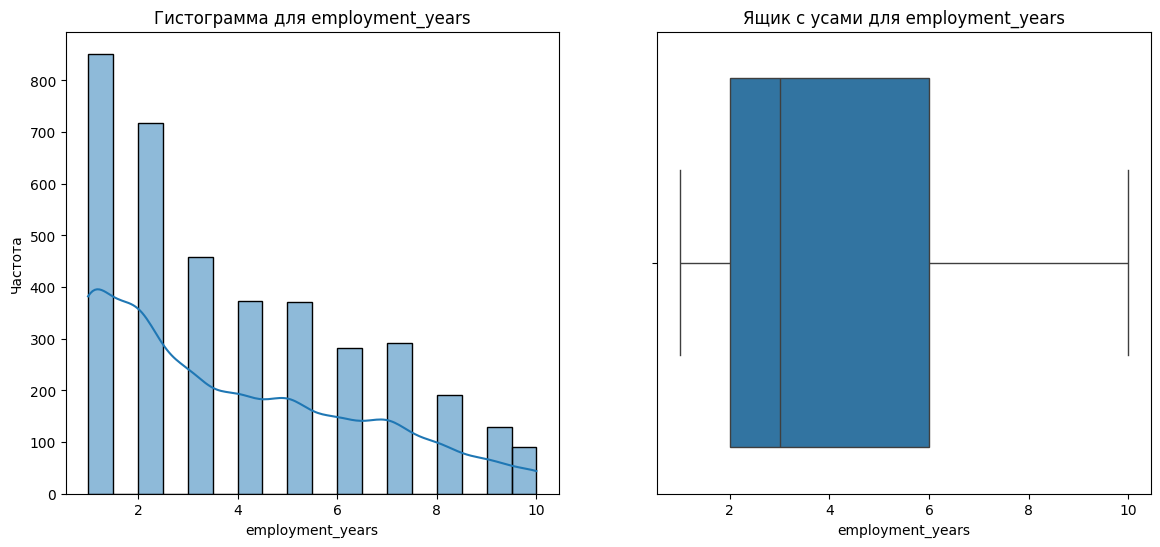

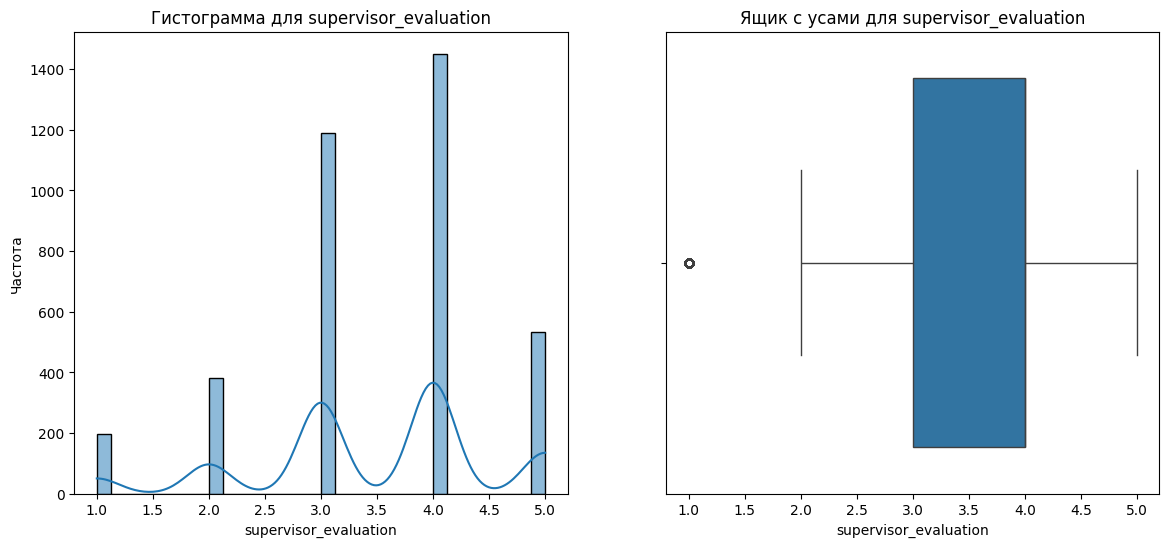

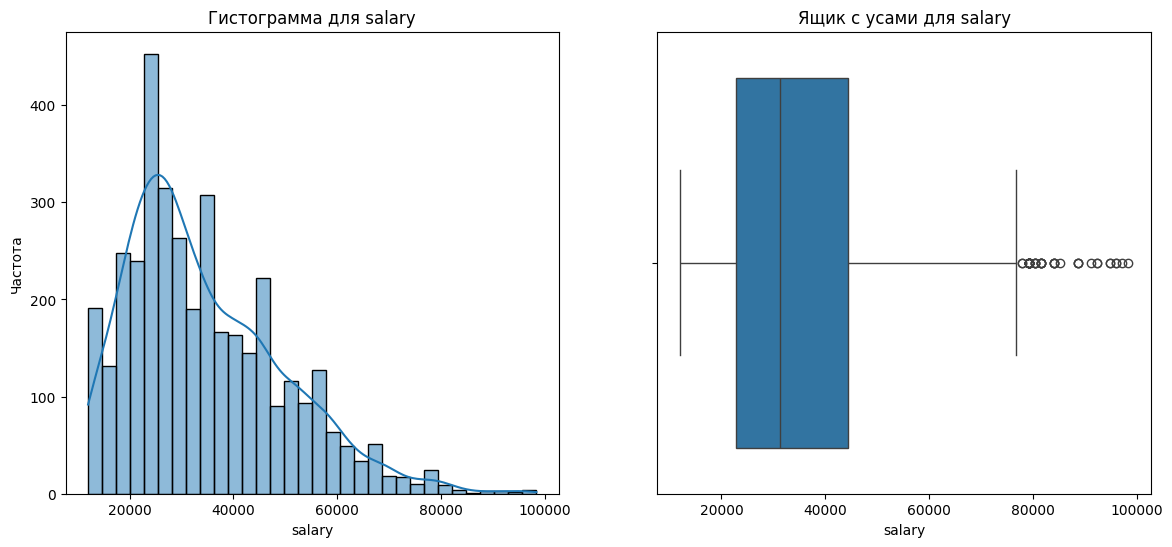

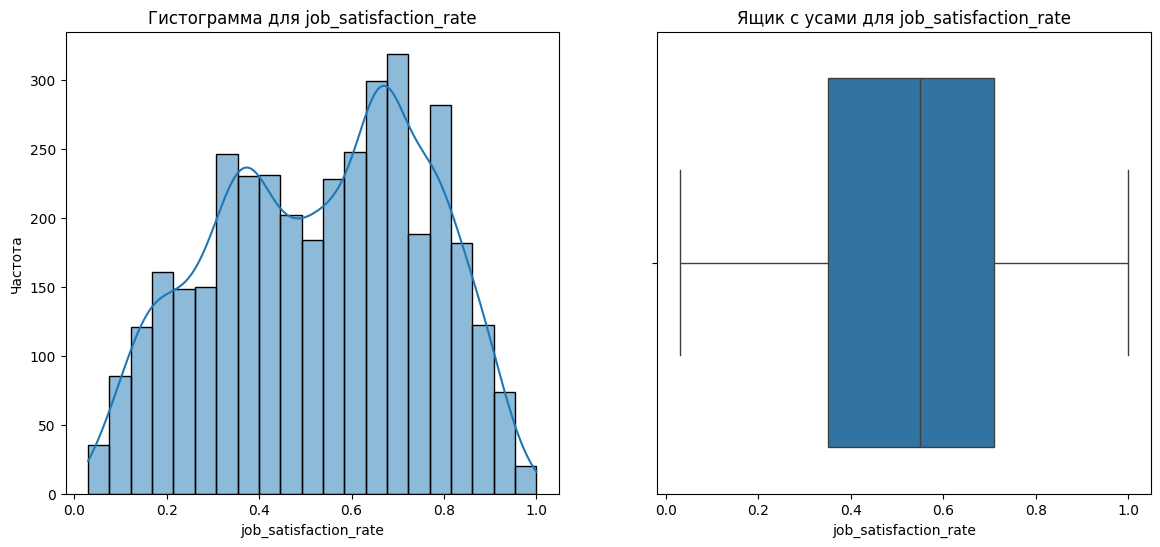

In [11]:
# Получаем список числовых столбцов
numeric_cols = train_data.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    plt.figure(figsize=(14,6))

    plt.subplot(1, 2, 1)
    sns.histplot(train_data[col], kde=True)
    plt.title(f'Гистограмма для {col}')
    plt.xlabel(col)  # подпись оси x
    plt.ylabel('Частота')  # подпись оси y

    plt.subplot(1, 2, 2)
    sns.boxplot(x=train_data[col])
    plt.title(f'Ящик с усами для {col}')
    plt.xlabel(col)  # подпись оси x


    plt.show()

Выводы по гистограммам следующие:
а.
- **Стаж работы**: Большинство сотрудников имеют стаж работы от 1 до 4 лет.
- **Оценка руководителя**: Оценки руководителей в основном сконцентрированы на уровне 3 и 4, есть выбросы с оценкой 1(предполагаю что такое возможно, по этому обрабатывать не имеет смысла).
- **Зарплата**: Зарплаты большей части сотрудников находятся в диапазоне от 20000 до 40000, есть выбросы зп больше 80000, тоже вероятно, особенно для руководящих должностей и ценных сотрудриков.
- **Уровень удовлетворенности работой**: Уровень удовлетворенности работой в основном распределен равномерно, но есть пик около значения 0.7.

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'><s>Для количественных признаков нужно кроме гистограммы вывести ящик с усами: первый хорошо показывает бимодальность, второй бимодальность не видит, но хорошо видит выбросы.\
Нужно оценить  нормальность распределений.\
    Так же, нужно подписать оси графикков - непонятно что и как посчитано на диаграммах.</s></font>

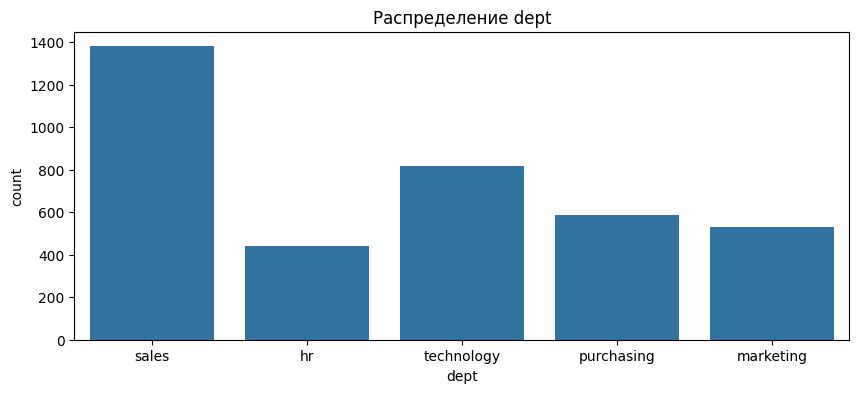

,count
dept,
sales,1380
technology,818
purchasing,586
marketing,531
hr,440


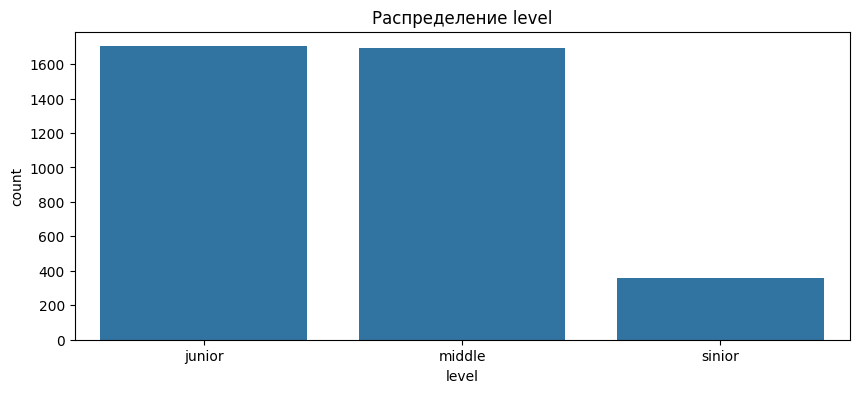

,count
level,
junior,1703
middle,1695
sinior,357


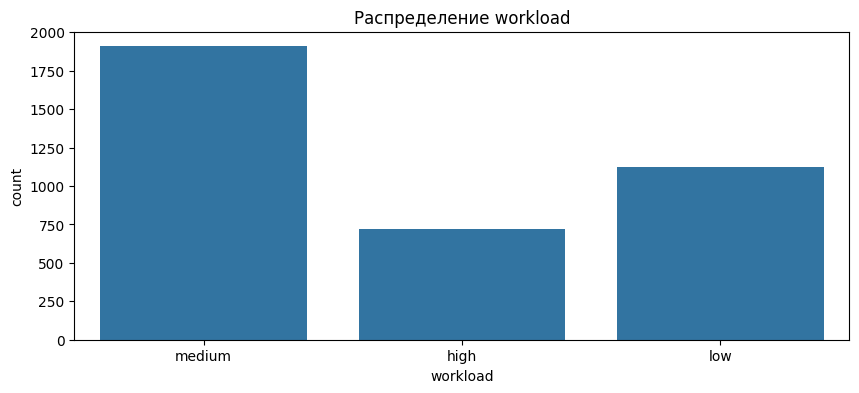

,count
workload,
medium,1908
low,1125
high,722


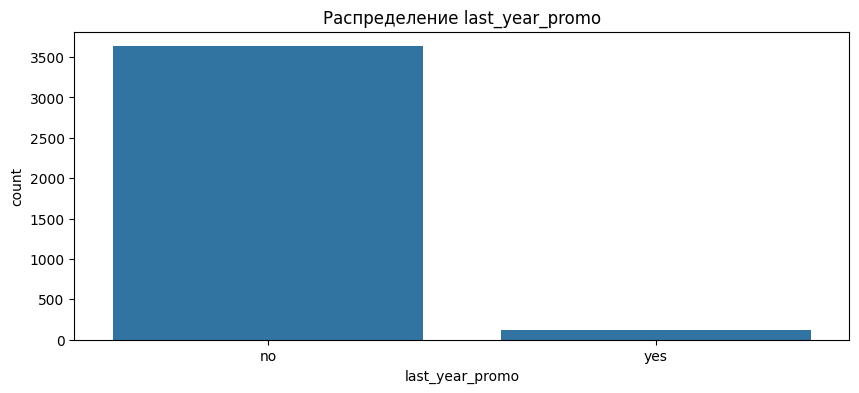

,count
last_year_promo,
no,3635
yes,120


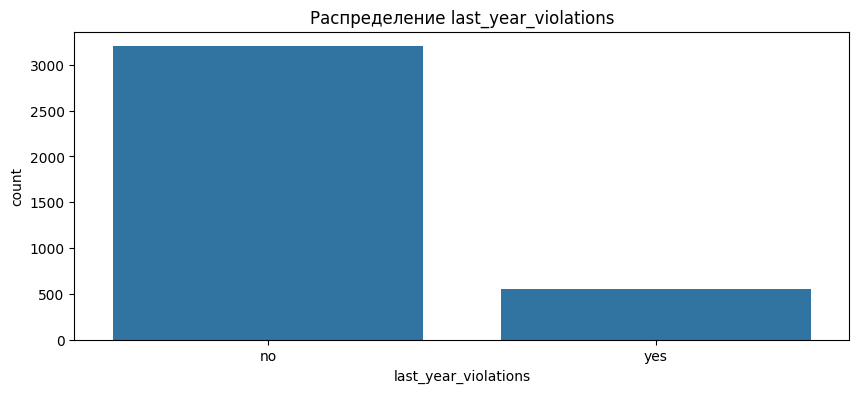

,count
last_year_violations,
no,3202
yes,553


In [12]:
for column in categorical_columns1:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=train_data, x=column)
    plt.title(f'Распределение {column}')
    plt.show()
    display(train_data[column].value_counts().to_frame())

Выводы по данным следующие:

- **Отдел (dept)**: Большинство сотрудников работают в отделе продаж (1380), за которым следует технологический отдел (818). Отдел закупок и маркетинга имеют 586 и 531 сотрудников соответственно. Отдел кадров насчитывает 440 сотрудников.
- **Уровень (level)**: Большинство сотрудников находятся на начальном уровне (1703), за которым следует средний уровень (1695). Сотрудников старшего уровня значительно меньше (357).
- **Нагрузка (workload)**: Большинство сотрудников имеют среднюю нагрузку (1908), за которыми следуют сотрудники с низкой нагрузкой (1125). Сотрудников с высокой нагрузкой меньше всего (722).
- **Последнее повышение (last_year_promo)**: Большинство сотрудников (3635) не получали повышения в прошлом году. Только небольшая часть сотрудников (120) получила повышение.
- **Нарушения в прошлом году (last_year_violations)**: Большинство сотрудников (3202) не имели нарушений в прошлом году. В то время как 553 сотрудников имели нарушения.


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>Хорошая работа в части исследования данных: молодец, что используешь функции, а также применяешь подходящие для типов данных инструменты.</font>

interval columns not set, guessing: ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']


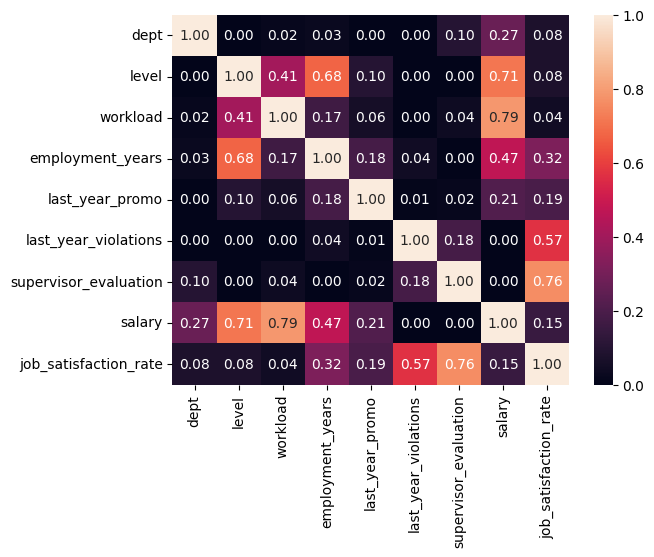

In [13]:
corr_matrix = train_data.phik_matrix()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()


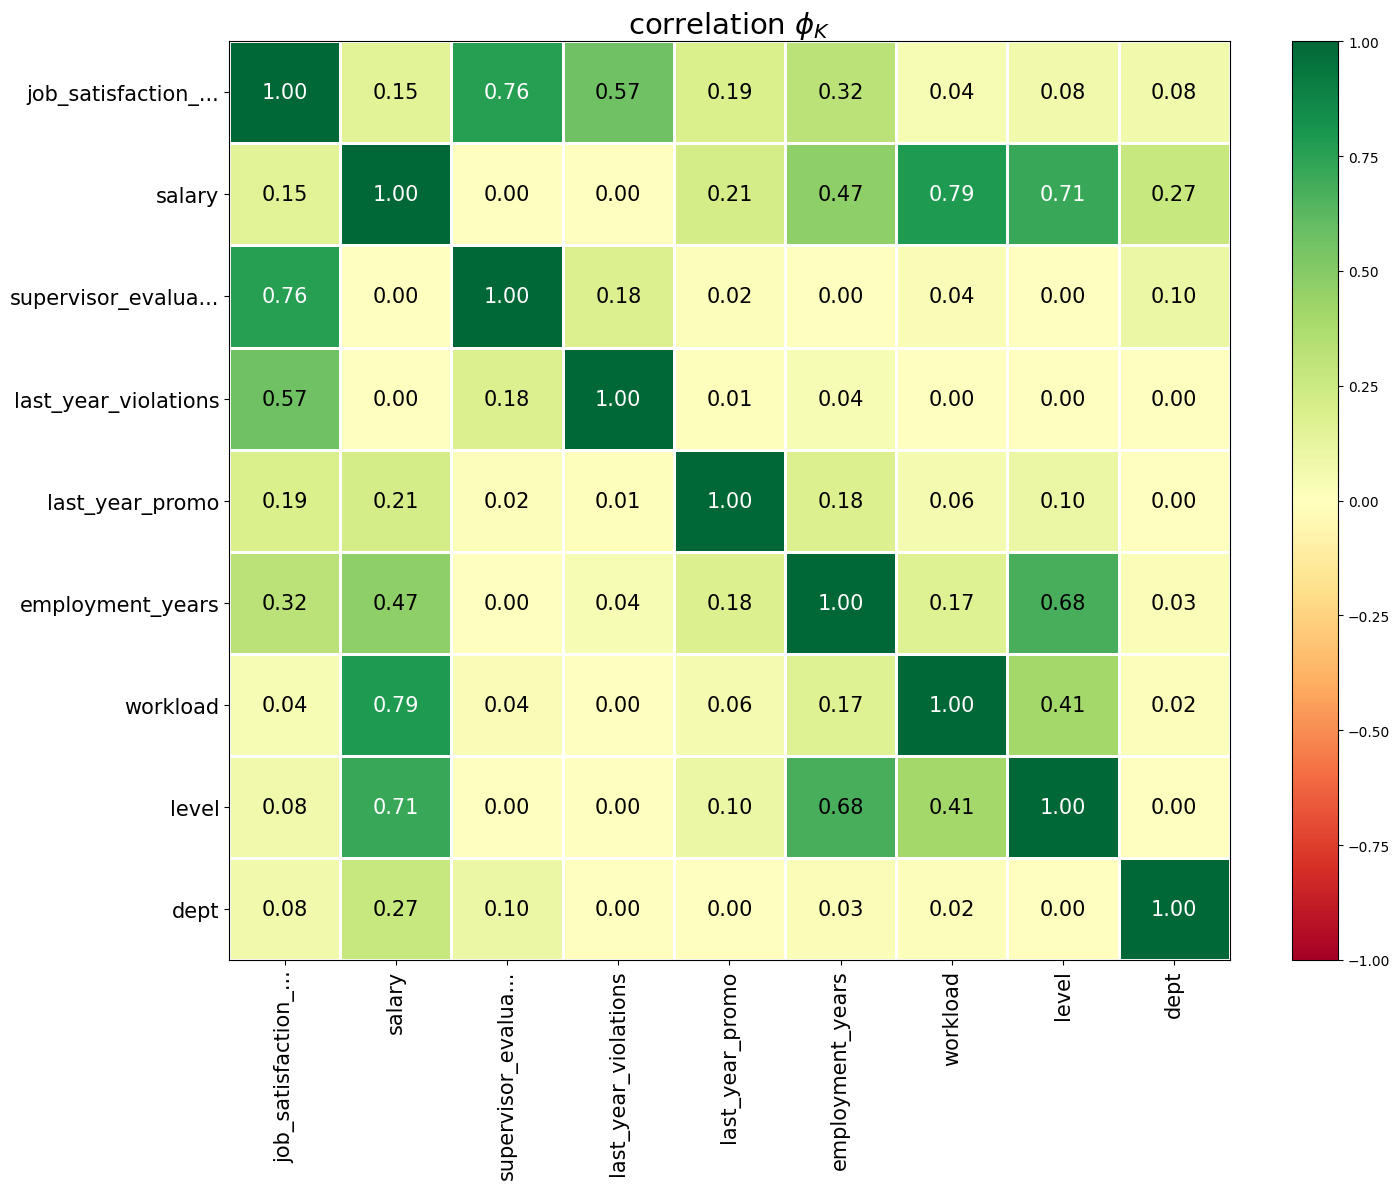

In [14]:
from phik.report import plot_correlation_matrix
from phik import report

# список интервальных признаков
interval_cols = ['salary', 'job_satisfaction_rate']

# вычисление коэффициентов корреляции phi для датафрейма 
phik_overview = train_data.phik_matrix(interval_cols=interval_cols)

# визуализация тепловой карты коэффициентов корреляции
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    title=r"correlation $\phi_K$",
    fontsize_factor=1.5,
    figsize=(15, 12)
)


<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='blue'>Обрати внимание, При использовании `phik` крайне важно настроить параметр `interval_cols`, передав ему список с названиями непрерывных признаков.</font>

<font color='blue'><b>Комментарий Студента: </b></font> ❌\
<font color='blue'>  тут я не понял как сделать, когда пробовал показывало только неприрывные признаки😅 .</font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ⚠️\
<font color='darkorange'>Ссылка на документацию: https://phik.readthedocs.io/en/latest/
Пример кода:</font>
```python
from phik.report import plot_correlation_matrix
from phik import report

# список интервальных признаков
interval_cols = ['salary', 'job_satisfaction_rate']

# вычисление коэффициентов корреляции phi для датафрейма df
phik_overview = df.phik_matrix(interval_cols=interval_cols)

# визуализация тепловой карты коэффициентов корреляции
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    title=r"correlation $\phi_K$",
    fontsize_factor=1.5,
    figsize=(15, 12)
)
```

<font color='blue'><b>Комментарий Студента: </b></font> ❌\
<font color='blue'>  чёт я разницу в графике не уловил, ну кроме того что обозначения вобратном порядке))
    
    (дописываю уже позже) а она обратную корреляцию ещё показывает походу, ну покрайней мере должна) . </font>

<font color='blue'><b>Комментарий ревьюера 3: </b></font> ✔️\
<font color='blue'> Здесь в основе Хи-квадрат - непарметрический тест, показывает корреляцию независимо от знака.</font>

### Исходя из представленной таблицы корреляций, можно сделать следующие выводы:

1. **Мультикорреляция**: Наблюдается высокая корреляция между некоторыми признаками. Например, `level` и `salary` имеют коэффициент корреляции 0.71, что указывает на сильную положительную связь. Также `workload` и `salary` имеют коэффициент корреляции 0.78. Это может указывать на мультиколлинеарность, что может быть проблемой для некоторых моделей машинного обучения, таких как линейная регрессия.

2. **Целевой признак**: Целевой признак `job_satisfaction_rate` наиболее сильно коррелирует с `supervisor_evaluation` (коэффициент корреляции 0.76) и `last_year_violations` (коэффициент корреляции 0.57). Это может указывать на то, что эти признаки важны для прогнозирования удовлетворенности работой.

## Шаг. Подготовка данных

In [15]:
train_data[['level', 'workload', 'supervisor_evaluation', 'employment_years']] = train_data[['level', 'workload', 'supervisor_evaluation', 'employment_years']].astype('category')
test_features[['level', 'workload', 'supervisor_evaluation', 'employment_years']] = test_features[['level', 'workload', 'supervisor_evaluation', 'employment_years']].astype('category')


In [16]:
# Определение категориальных колонок для One-Hot-Encoding
ohe_columns = train_data.select_dtypes(include=['object']).columns.tolist()
ord_columns = train_data.select_dtypes(include=['category']).columns.tolist()
# Определение числовых колонок
num_columns = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_columns.remove('job_satisfaction_rate')

print("Numeric columns: ", num_columns)
print("ORD columns: ", ord_columns)
print("OHE columns: ", ohe_columns)

Numeric columns:  ['salary']
ORD columns:  ['level', 'workload', 'employment_years', 'supervisor_evaluation']
OHE columns:  ['dept', 'last_year_promo', 'last_year_violations']


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Отлично, что разделяешь категории на порядковые и номинальные.</font>

In [17]:
X_train = train_data.drop('job_satisfaction_rate', axis=1)
y_train = train_data['job_satisfaction_rate']

# Объединение test_features и test_target по 'id' 
test_data = pd.merge(test_features, test_target, on='id')
# Удаление столбца 'id'
test_data = test_data.drop('id', axis=1)
# Разделение test_data на тестовую выборку и целевую переменную
X_test = test_data.drop('job_satisfaction_rate', axis=1)
y_test = test_data['job_satisfaction_rate']

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Верно, при объединении таблиц нужно привязаться к уникальному `"id"`.</font>

In [18]:
for name, df in zip(["X_train", "y_train", "X_test", "y_test"], [X_train, y_train, X_test, y_test]):
    display(f"{name}:", df.head(5))


'X_train:'

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,sales,junior,medium,2,no,no,1,24000
1,hr,junior,high,2,no,no,5,38400
2,sales,junior,low,1,no,no,2,12000
3,technology,junior,low,4,no,no,2,18000
4,hr,junior,medium,1,no,no,3,22800


'y_train:'

0    0.58
1    0.76
2    0.11
3    0.37
4    0.20
Name: job_satisfaction_rate, dtype: float64

'X_test:'

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,marketing,junior,medium,2,no,no,5,28800
1,hr,junior,medium,1,no,no,4,30000
2,sales,middle,low,5,no,no,4,19200
3,sales,middle,low,6,no,no,4,19200
4,hr,middle,medium,5,no,no,5,40800


'y_test:'

0    0.79
1    0.72
2    0.64
3    0.60
4    0.75
Name: job_satisfaction_rate, dtype: float64

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>Датафреймы лучше всегда ограничивать методами .head(), .tail(), sample(). Иначе в выводах ячейки записывается весь Датафрейм, хоть он и не выводится на экран полностью. Такие Аутпуты сильно перегружают тетрадку.</font>

<font color='blue'><b>Комментарий Студента: </b></font> \
<font color='blue'>  а, я просто думал это не критично учитывая что наборы маленькие, к тому же я сначала в vscode делаю, там в разы быстрее код выполняеться .</font>

In [19]:
# Добавляем новый шаг в пайплайн
categorical_pipeline.steps.append(('encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)))

# Создание пайплайна для числовых признаков
numerical_pipeline = Pipeline(steps=[
    ('scaler', MinMaxScaler())  
])

ordinal_pipeline = Pipeline(steps=[
    ('ord',  OrdinalEncoder(categories=[['junior', 'middle', 'sinior'],
                                        ['low', 'medium', 'high'],
                                        ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'],
                                        ['1', '2', '3', '4', '5']],
                            handle_unknown='use_encoded_value', unknown_value=-np.nan),
     ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    )
])


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_pipeline, ohe_columns),
        ('num', numerical_pipeline, num_columns),
        ('ord', ordinal_pipeline, ord_columns)
    ],
    remainder='passthrough'
)


<font color='blue'><b>Комментарий ревьюера 2: </b></font> ⚠️\
<font color='darkorange'>Бывает так, что в тестовой или валидационной  выборке случается категория которой не было в обучающих данных и **OrdinalEncoder** ей не "обучен". \
Что бы не возникало ошибок с неизвесными категориями, нужно использовать параметры энкодера: `handle_unknown`, `unknown_value` или `encoded_missing_value`</font>\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

<font color='blue'><b>Комментарий ревьюера 3: </b></font> ⚠️\
<font color='darkorange'> Здесь код упадёт, если случиться `' '` в данных. Нужен Импутер после OrdinalEncoder.</font>

In [20]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat',
                                 Pipeline(steps=[('replace_blank_with_nan',
                                                  FunctionTransformer(func=<function replace_blank_with_nan at 0x000001F34B740040>)),
                                                 ('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['dept', 'last_year_promo',
                                  '...
                                ('ord',
                                 Pipeline(steps=[('ord',
                                                  OrdinalEncoder(categories=[['junior',
                                                                              'middle',
                                                                              'sinior'],
                                                                             ['low',
                                                                              'medium',
                                                                              'high'],
                                                                             ['1',
                                                                              '2',
                                                                              '3',
                                                                              '4',
                                                                              '5',
                                                                              '6',
                                                                              '7',
                                                                              '8',
                                                                              '9',
                                                                              '10'],
                                                                             ['1',
                                                                              '2',
                                                                              '3',
                                                                              '4',
                                                                              '5']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  ('imputer',
                                                   SimpleImputer(strategy='most_frequent')))]),
                                 ['level', 'workload', 'employment_years',
                                  'supervisor_evaluation'])])

### Мы успешно подготовили данные для обучения и тестирования модели машинного обучения. Вот основные шаги, которые мы выполнили:

1. **Преобразование категориальных признаков**: Мы преобразовали выбранные категориальные признаки в тип 'category' с помощью метода `astype('category')`.

2. **Определение колонок**: Мы определили категориальные колонки для кодирования One-Hot-Encoding (`ohe_columns`) и ординальные колонки (`ord_columns`). Мы также определили числовые колонки (`num_columns`), исключая столбец 'job_satisfaction_rate'.

3. **Создание обучающих и тестовых выборок**: Мы создали обучающие и тестовые выборки (`X_train`, `y_train`, `X_test`, `y_test`) путем удаления столбца 'job_satisfaction_rate' из исходных данных.

4. **Объединение тестовых признаков и целевой переменной**: Мы объединили тестовые признаки и тестовую целевую переменную по столбцу 'id' и удалили столбец 'id' из тестовых данных.

5. **Создание пайплайнов для преобразования признаков**: Мы создали пайплайн для преобразования категориальных признаков с использованием `OneHotEncoder`, пайплайн для числовых признаков с применением `MinMaxScaler` и пайплайн для ординальных признаков с использованием `OrdinalEncoder`.

6. **Объединение пайплайнов в препроцессор**: Мы объединили все пайплайны в единый препроцессор (`preprocessor`) с помощью `ColumnTransformer`.

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

## Шаг. Обучение моделей

In [21]:


RANDOM_STAT = 42

# Функция для вычисления SMAPE
def smape(y_true, y_pred):
    return 100 / len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

smape_scorer = make_scorer(smape, greater_is_better=False)

pipe_final = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

param_grid = [
    {
        'model': [LinearRegression()],
        'preprocessor__num': [MinMaxScaler(), Normalizer(), StandardScaler(), RobustScaler(), 'passthrough']
    },
    {
        'model': [DecisionTreeRegressor(random_state=RANDOM_STAT)],
        'model__max_depth': np.arange(10, 20),
        'model__min_samples_split': np.arange(10, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), Normalizer(), 'passthrough']
    }
]

# Создание объекта GridSearchCV с PredefinedSplit вместо числа складок
grid = GridSearchCV(
    pipe_final,
    param_grid=param_grid,
    cv=5,
    scoring=smape_scorer,
    n_jobs=-1
)

# Обучение моделей
grid.fit(X_train, y_train)

ValueError: 
All the 2525 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2525 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ivano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ivano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ivano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\pipeline.py", line 471, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ivano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\pipeline.py", line 408, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ivano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ivano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\pipeline.py", line 1303, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ivano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\_set_output.py", line 295, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ivano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ivano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\compose\_column_transformer.py", line 914, in fit_transform
    result = self._call_func_on_transformers(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ivano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\compose\_column_transformer.py", line 823, in _call_func_on_transformers
    return Parallel(n_jobs=self.n_jobs)(jobs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ivano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\parallel.py", line 67, in __call__
    return super().__call__(iterable_with_config)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ivano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\parallel.py", line 1863, in __call__
    return output if self.return_generator else list(output)
                                                ^^^^^^^^^^^^
  File "C:\Users\ivano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\parallel.py", line 1792, in _get_sequential_output
    res = func(*args, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ivano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\parallel.py", line 129, in __call__
    return self.function(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ivano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\pipeline.py", line 1303, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ivano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ivano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\pipeline.py", line 534, in fit_transform
    routed_params = self._check_method_params(method="fit_transform", props=params)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ivano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\pipeline.py", line 362, in _check_method_params
    for name, step in self.steps
        ^^^^^^^^^^
ValueError: too many values to unpack (expected 2)


In [ ]:
# Установка опции для отображения максимальной ширины столбца
pd.set_option('display.max_colwidth', None)

# Преобразование результатов в DataFrame
results = pd.DataFrame(grid.cv_results_)

# Добавление столбца с именем модели
results['model_name'] = results['param_model'].apply(lambda x: x.__class__.__name__)

# Группировка по имени модели и получение индекса строки с максимальной оценкой для каждой модели
idx = results.groupby(['model_name'])['mean_test_score'].idxmax()

# Фильтрация DataFrame по этим индексам
best_results = results.loc[idx]

# Выбор только столбцов 'params' и 'mean_test_score'
best_results = best_results[['params', 'mean_test_score']]

# Сортировка DataFrame по 'mean_test_score' в порядке убывания
best_results = best_results.sort_values('mean_test_score', ascending=False)

# Вывод результатов
print("Лучшие параметры каждой модели и её оценки:\n")
display(best_results)


In [ ]:

# Вывод лучшей модели и ее параметров
print('Лучшая модель и её параметры:\n\n', grid.best_estimator_)

# Вывод метрики лучшей модели на тренировочной выборке
print('Метрика лучшей модели на тренировочной выборке:', grid.best_score_)

# Предсказание на тестовой выборке
y_test_pred = grid.predict(X_test)

smape = smape(y_test, y_test_pred)

print(f'Метрика лучшей модели на тренировочной выборке: {smape}')


<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> ~~Выбирать модели на тестовых данных нельзя - так мы подстраиваемся конкретно под тестовую выборку. Тестирование проводится только для лучшей модели отобранной по результатам кроссвалидации.~~</font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>Подбор гиперпараметров проведён верно. Использована целевая метрика, направление отбора верное ).</font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>Тестирование проведено верно.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> После GridSearchCV, оценку модели с лучшими параметрами можно получить как `linear_pipeline_cv.best_score_` </font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ⚠️\
<font color='darkorange'> Можно подбирать параметры по двум моделям. Оценки моделей можно вытащить из `pipeline_cv.cv_results_`</font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ⚠️\
<font color='darkorange'>`'classifier'` - странное название для моделей Регрессии.</font>

### Анализ Моделей

Были обучены две модели: **линейная регрессия** и **дерево решений**. Для оценки качества моделей использовалась метрика SMAPE (Symmetric Mean Absolute Percentage Error).

#### Метрики моделей на обучающей выборке

- **Линейная модель**: SMAPE = -24.99
- **Модель дерева решений**: SMAPE = -15.1335

Метрика моделей отображается со знаком минус, потому что использовали make_scorer(smape, greater_is_better=False) при создании smape_scorer. Параметр greater_is_better=False указывает, что меньшие значения smape являются лучшими.

#### Метрика лучшей модели на тестовой выборке

- **Модель дерева решений**: SMAPE = 13.65

#### Выводы

- **Лучшая модель**: Модель дерева решений с параметрами `max_depth=18`, `min_samples_split=11`, `random_state=42`. Эта модель показала наименьшую ошибку SMAPE.
- **Худшая модель**: Линейная модель. Эта модель показала большую ошибку SMAPE по сравнению с моделью дерева решений.

---

## Общий вывод

На основании проведенного анализа, модель дерева решений показала лучшие результаты по сравнению с линейной моделью.

Модель дерева решений могла справиться лучше по нескольким причинам:

1. **Сложность модели**: Деревья решений обычно могут моделировать более сложные зависимости в данных по сравнению с линейными моделями.

2. **Работа с категориальными признаками**: Деревья решений могут лучше справляться с категориальными признаками, особенно если есть нелинейные зависимости между категориальными признаками и целевой переменной.

3. **Регуляризация**: В модели дерева решений мы использовали гиперпараметры `max_depth`, `min_samples_split` и `min_samples_leaf` для регуляризации модели, что могло помочь предотвратить переобучение и улучшить обобщающую способность модели.



<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> ~~Есть моменты для доработки. Конкретные замечания даны выше.~~</font>

<font color='blue'><b>Комментарий ревьюера 3: </b></font> ✔️\
<font color='green'> 👍</font>

# Задача 2: предсказание увольнения сотрудника из компании
Для этой задачи те же входные признаки, что и в предыдущей задаче. Однако целевой признак отличается: это quit — увольнение сотрудника из компании.

## Шаг 1. Загрузка данных

In [ ]:
# Загрузка тренировочной выборки
train_data_quit = pd.read_csv('/datasets/train_quit.csv')

# Загрузка входных признаков тестовой выборки
test_features_quit = pd.read_csv('/datasets/test_features.csv')

# Загрузка целевого признака тестовой выборки
test_target_quit = pd.read_csv('/datasets/test_target_quit.csv')

In [ ]:
# Просмотр информации о тренировочных данных
print("Информация о тренировочных данных:")
display(train_data_quit.info())

# Описательная статистика тренировочных данных
print("Описательная статистика тренировочных данных:")
display(train_data_quit.describe())

# Просмотр первых строк тренировочных данных
print("Первые строки тренировочных данных:")
display(train_data_quit.head())

# Просмотр информации о тестовых данных (признаки)
print("Информация о тестовых данных (признаки):")
display(test_features_quit.info())

# Просмотр первых строк тестовых данных (признаки)
print("Первые строки тестовых данных (признаки):")
display(test_features_quit.head())

# Просмотр первых строк тестовых данных (целевая переменная)
print("Первые строки тестовых данных (целевая переменная):")
display(test_target_quit.head())

### По предоставленной информации видно, что данные для обучения моделей имеют следующую структуру:

В тренировочной выборке содержится 4000 записей с 10 признаками. Из них 4 признака являются числовыми (id, employment_years, supervisor_evaluation, salary), а 6 признаков являются категориальными (dept, level, workload, last_year_promo, last_year_violations, quit).

Входные признаки тестовой выборки имеют 2000 записей с 9 признаками. Аналогично тренировочной выборке, 4 признака являются числовыми, а 5 признаков - категориальными. Были обнаружены пропущенные значения в признаках dept и level.

Целевой признак тестовой выборки содержит 2000 записей, состоящих из идентификаторов сотрудников и значения, указывающего на то, уволился ли сотрудник или нет.

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

## Шаг 2. Предобработка данных

In [ ]:
# Удаление столбца 'id'
train_data_quit = train_data_quit.drop('id', axis=1)

Удаление столбца 'id'

Я успешно удалил столбец 'id' из набора данных `train_data_quit`. Это важный шаг, поскольку столбец 'id' является уникальным идентификатором и не несет информативной нагрузки для модели машинного обучения. Кроме того, его удаление упрощает поиск дубликатов в данных, поскольку теперь каждая строка должна быть уникальна с точки зрения содержащейся в ней информации. Это поможет улучшить качество наших данных и упростит дальнейший анализ.


In [ ]:
# Проверка на пропуски в тренировочной выборке
train_data_missing = train_data_quit.isnull().sum()
print("Пропуски в тренировочной выборке:")
print(train_data_missing)

# Проверка на пропуски в тестовой выборке
test_data_missing = test_features_quit.isnull().sum()
print("Пропуски в тестовой выборке:")
print(test_data_missing)

# Проверка на пропуски в целевом признаке тестовой выборке
target_data_missing = test_target_quit.isnull().sum()
print("Пропуски в целевом признаке тестовой выборке:")
print(target_data_missing)

В тренировочной выборке нет пропусков.

В тестовой выборке имеются пропуски в следующих признаках:

dept: 2 пропуска
level: 1 пропуск


Целевой признак "quit" в тестовой выборке не содержит пропусков.

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

Заполнение пропусков в тестовой выборке

Для заполнения пропусков в признаках "dept" и "level" тестовой выборки используется стратегия "most_frequent" с помощью SimpleImputer из библиотеки sklearn.impute.

In [ ]:
# Проверка тренировочной выборки на дубликаты
train_duplicates = train_data_quit.duplicated()
num_train_duplicates = train_duplicates.sum()
print(f"Количество дубликатов в train_data_quit: {num_train_duplicates}")
display(train_data_quit[train_duplicates])
# Удаление дубликатов из train_data_quit
train_data_quit = train_data_quit.drop_duplicates()

# Проверка на дубликаты после удаления
train_duplicates = train_data_quit.duplicated()
num_train_duplicates = train_duplicates.sum()
print(f"Количество дубликатов в train_data_quit после удаления: {num_train_duplicates}")


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

In [ ]:
# Вывод уникальных значений по категориальным столбцам
categorical_columns = train_data_quit.select_dtypes(include='object').columns
for column in categorical_columns:
    unique_values = train_data_quit[column].unique()
    print(f"Уникальные значения в столбце {column}:")
    print(unique_values)
    print()

# Вывод уникальных значений по категориальным столбцам
categorical_columns = test_features_quit.select_dtypes(include='object').columns
for column in categorical_columns:
    unique_values = test_features_quit[column].unique()
    print(f"Уникальные значения в столбце {column}:")
    print(unique_values)
    print()

In [ ]:
columns_fal = ['dept', 'level', 'workload']
# Создание пайплайна для категориальных столбцов
categorical_pipeline = Pipeline(steps=[
    ('replace_blank_with_nan', FunctionTransformer(replace_blank_with_nan)),
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

train_data_quit[columns_fal] = categorical_pipeline.fit_transform(train_data_quit[columns_fal])

test_features_quit[columns_fal] = categorical_pipeline.transform(test_features_quit[columns_fal])


<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'>~~Обучение на тестовых данных.~~</font>

### Общий вывод
В тренировочной выборке присутствовали дубликаты. 

В тестовой выборке были обнаружены пропуски в признаках "dept" (2 пропуска) и "level" (1 пропуск), которые были успешно заполнены наиболее часто встречающимися значениями. 


Уникальные значения говорят о том что в категориальных столбцах нет не явных дубликатов и опечаток, но было пустое значение ' '.

## Шаг 3. Исследовательский анализ данных

In [ ]:
# Нормализуем данные
normalized_quit_by_dept = train_data_quit.groupby(['dept'])['quit'].value_counts(normalize=True).unstack()

# Выводим нормализованные данные
print("Доля уволившихся и оставшихся сотрудников по отделам:")
print(normalized_quit_by_dept)

# Создаем фигуру и оси
fig, ax = plt.subplots()

# Добавляем данные в график
ax.bar(normalized_quit_by_dept.index, normalized_quit_by_dept['yes'], color='red', label='yes')
ax.bar(normalized_quit_by_dept.index, normalized_quit_by_dept['no'], color='green', label='no', alpha=0.5, bottom=normalized_quit_by_dept['yes'])

# Добавляем легенду
ax.legend()

# Показываем график
plt.show()


<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> ~~Распределение категорий в данных неравномерное, поэтому нужно нормализовать количество ушедших относительно исследуемого признака, Например из какого департамента уходят чаще, оносительно количества работающих в департаменте.\
Сделать это можно сгруппировав данные по признаку и посчитать долю таргета в каждом из значений (`.groupby(['dept'])['quit'].value_counts(normalize=True)`)~~</font>

 Доля уволившихся и оставшихся сотрудников по отделам:

| Отдел | Остались | Уволились |
|-------|----------------|----------------|
| HR | 0.764368 | 0.235632 |
| Маркетинг | 0.735225 | 0.264775 |
| Закупки | 0.720930 | 0.279070 |
| Продажи | 0.762733 | 0.237267 |
| Технологии | 0.741824 | 0.258176 |

Из представленных данных можно сделать следующие выводы:

1. **Отдел закупок** имеет наибольшую долю уволившихся сотрудников (27.9%), что может указывать на возможные проблемы в этом отделе. Это может быть связано с условиями труда, уровнем зарплаты, культурой компании в этом отделе или другими факторами.

2. **Отдел HR** и **отдел продаж** имеют наименьшую долю уволившихся сотрудников (23.6% и 23.7% соответственно), что может говорить о хороших условиях работы в этих отделах.

3. В целом, средняя доля уволившихся сотрудников 25.4% и варьируется от отдела к отделу, что подчеркивает важность учета специфики каждого отдела при анализе текучести кадров.




In [ ]:
# Получаем данные
quit_by_level = train_data_quit[train_data_quit['quit'] == 'yes']['level'].value_counts()
quit_by_level_stay = train_data_quit[train_data_quit['quit'] == 'no']['level'].value_counts()

# Выводим количество уволившихся и оставшихся сотрудников по уровню
print("Количество уволившихся сотрудников по уровню:")
display(quit_by_level)
print("Количество оставшихся сотрудников по уровню:")
display(quit_by_level_stay)

# Создаем фигуру и оси
fig, ax = plt.subplots()

# Добавляем данные в график
ax.bar(quit_by_level.index, quit_by_level.values, color='red', label='yes')
ax.bar(quit_by_level_stay.index, quit_by_level_stay.values, color='green', label='no', alpha=0.5)

# Добавляем легенду
ax.legend()

# Показываем график
plt.show()

Большинство уволившихся сотрудников были на уровне "junior" (537), наименьшее количество - на уровне "senior" (17).

Большинство оставшихся сотрудников находятся на уровне "middle" (1181), наименьшее количество - на уровне "senior" (330).

In [ ]:
# Получаем данные
quit_by_workload = train_data_quit[train_data_quit['quit'] == 'yes']['workload'].value_counts()
quit_by_workload_stay = train_data_quit[train_data_quit['quit'] == 'no']['workload'].value_counts()

# Выводим количество уволившихся и оставшихся сотрудников по уровню загруженности
print("Количество уволившихся сотрудников по уровню загруженности:")
print(quit_by_workload)
print("Количество оставшихся сотрудников по уровню загруженности:")
print(quit_by_workload_stay)

# Создаем фигуру и оси
fig, ax = plt.subplots()

# Добавляем данные в график
ax.bar(quit_by_workload.index, quit_by_workload.values, color='red', label='yes')
ax.bar(quit_by_workload_stay.index, quit_by_workload_stay.values, color='green', label='no', alpha=0.5)

# Добавляем легенду
ax.legend()

# Показываем график
plt.show()

Большинство уволившихся сотрудников имели низкую загруженность (291), а наименьшее количество - высокую загруженность (109).

Большинство оставшихся сотрудников также имеют среднюю загруженность (989), а наименьшее количество - низкую загруженность (455).

In [ ]:
# Получаем данные
quit_by_employment_years = train_data_quit[train_data_quit['quit'] == 'yes']['employment_years'].value_counts()
quit_by_employment_years_stay = train_data_quit[train_data_quit['quit'] == 'no']['employment_years'].value_counts()

# Выводим количество уволившихся и оставшихся сотрудников по годам занятости
print("Количество уволившихся сотрудников по годам занятости:")
print(quit_by_employment_years)
print("Количество оставшихся сотрудников по годам занятости:")
print(quit_by_employment_years_stay)

# Создаем фигуру и оси
fig, ax = plt.subplots()

# Добавляем данные в график
ax.bar(quit_by_employment_years.index, quit_by_employment_years.values, color='red', label='yes')
ax.bar(quit_by_employment_years_stay.index, quit_by_employment_years_stay.values, color='green', label='no', alpha=0.5)

# Добавляем легенду
ax.legend()

# Показываем график
plt.show()

Большинство уволившихся сотрудников работали в компании 1 год (276), наименьшее количество - 8-9-10 лет (3).

Большинство оставшихся сотрудников также работают в компании 4 года (286), наименьшее количество - 10 лет (83).

In [ ]:
# Получаем данные
quit_by_last_year_promo = train_data_quit[train_data_quit['quit'] == 'yes']['last_year_promo'].value_counts()
quit_by_last_year_promo_stay = train_data_quit[train_data_quit['quit'] == 'no']['last_year_promo'].value_counts()

# Выводим количество уволившихся и оставшихся сотрудников по повышениям в прошлом году
print("Количество уволившихся сотрудников по повышениям в прошлом году:")
print(quit_by_last_year_promo)
print("Количество оставшихся сотрудников по повышениям в прошлом году:")
print(quit_by_last_year_promo_stay)

# Создаем фигуру и оси
fig, ax = plt.subplots()

# Добавляем данные в график
ax.bar(quit_by_last_year_promo.index, quit_by_last_year_promo.values, color='red', label='yes')
ax.bar(quit_by_last_year_promo_stay.index, quit_by_last_year_promo_stay.values, color='green', label='no', alpha=0.5)

# Добавляем легенду
ax.legend()

# Показываем график
plt.show()

Большинство уволившихся сотрудников не получали повышений в прошлом году (654), только 1 сотрудник получил повышение.

Большинство оставшихся сотрудников также не получали повышений в прошлом году (1822), но 110 сотрудников получили повышение.

In [ ]:
# Получаем данные
quit_by_last_year_violations = train_data_quit[train_data_quit['quit'] == 'yes']['last_year_violations'].value_counts()
quit_by_last_year_violations_stay = train_data_quit[train_data_quit['quit'] == 'no']['last_year_violations'].value_counts()

# Выводим количество уволившихся и оставшихся сотрудников по нарушениям в прошлом году
print("Количество уволившихся сотрудников по нарушениям в прошлом году:")
print(quit_by_last_year_violations)
print("Количество оставшихся сотрудников по нарушениям в прошлом году:")
print(quit_by_last_year_violations_stay)

# Создаем фигуру и оси
fig, ax = plt.subplots()

# Добавляем данные в график
ax.bar(quit_by_last_year_violations.index, quit_by_last_year_violations.values, color='red', label='yes')
ax.bar(quit_by_last_year_violations_stay.index, quit_by_last_year_violations_stay.values, color='green', label='no', alpha=0.5)

# Добавляем легенду
ax.legend()

# Показываем график
plt.show()


Большинство уволившихся сотрудников не имели нарушений в прошлом году (475), но 180 сотрудников имели нарушения.

Большинство оставшихся сотрудников также не имели нарушений в прошлом году (1636), но 296 сотрудников имели нарушения.

In [ ]:
# Получаем данные
quit_by_supervisor_evaluation = train_data_quit[train_data_quit['quit'] == 'yes']['supervisor_evaluation'].value_counts()
quit_by_supervisor_evaluation_stay = train_data_quit[train_data_quit['quit'] == 'no']['supervisor_evaluation'].value_counts()

# Выводим количество уволившихся и оставшихся сотрудников по оценке руководителя
print("Количество уволившихся сотрудников по оценке руководителя:")
print(quit_by_supervisor_evaluation)
print("Количество оставшихся сотрудников по оценке руководителя:")
print(quit_by_supervisor_evaluation_stay)

# Создаем фигуру и оси
fig, ax = plt.subplots()

# Добавляем данные в график
ax.bar(quit_by_supervisor_evaluation.index, quit_by_supervisor_evaluation.values, color='red', label='yes')
ax.bar(quit_by_supervisor_evaluation_stay.index, quit_by_supervisor_evaluation_stay.values, color='green', label='no', alpha=0.5)

# Добавляем легенду
ax.legend()

# Показываем график
plt.show()


Большинство уволившихся сотрудников получили оценку руководителя 3 (272), наименьшее количество - оценку 5 (43).

Большинство оставшихся сотрудников также получили оценку руководителя 4 (734), наименьшее количество - оценку 1 (102).

In [ ]:
# Получаем данные
salary_quit = train_data_quit[train_data_quit['quit'] == 'yes']['salary']
salary_stay = train_data_quit[train_data_quit['quit'] == 'no']['salary']

# Создаем фигуру и оси
fig, ax = plt.subplots()

# Добавляем данные в график
ax.hist(salary_quit, bins=30, color='red', alpha=0.5, label='yes', density=True)
ax.hist(salary_stay, bins=30, color='green', alpha=0.5, label='no', density=True)

# Добавляем легенду и подписи осей
ax.legend()
ax.set_xlabel('Зарплата')
ax.set_ylabel('Доля сотрудников')

# Показываем график
plt.show()

# Получаем данные
mean_salary_quit = train_data_quit[train_data_quit['quit'] == 'yes']['salary'].mean()
mean_salary_stay = train_data_quit[train_data_quit['quit'] == 'no']['salary'].mean()

# Выводим среднюю зарплату уволившихся и оставшихся сотрудников
print("Средняя зарплата уволившихся сотрудников:", mean_salary_quit)
print("Средняя зарплата оставшихся сотрудников:", mean_salary_stay)


<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'>~~Выборки разного размера, нужна нормализация по плотности \
В данном случае нужно использовать параметр "density=True" в методе ".hist()". Так бы нам удалось перейти от количества к доле.~~</font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> Отлично!  👍</font>

### На основе предоставленных данных, можно составить следующий портрет "уволившегося сотрудника":

- **Отдел**: Уволившиеся сотрудники чаще всего работали в отделе продаж (191 человек), а реже всего - в отделе HR (82 человека).
- **Уровень**: Большинство уволившихся сотрудников были на уровне "junior" (537 человек), наименьшее количество - на уровне "senior" (17 человек).
- **Уровень загруженности**: Большинство уволившихся сотрудников имели низкую загруженность (291 человек), наименьшее количество - высокую загруженность (109 человек).
- **Годы занятости**: Большинство уволившихся сотрудников работали в компании 1 год (276 человек), наименьшее количество - 8-9-10 лет (3 человека).
- **Повышения в прошлом году**: Большинство уволившихся сотрудников не получали повышений в прошлом году (654 человек), только 1 сотрудник получил повышение.
- **Нарушения в прошлом году**: Большинство уволившихся сотрудников не имели нарушений в прошлом году (475 человек), но 180 сотрудников имели нарушения.
- **Оценка руководителя**: Большинство уволившихся сотрудников получили оценку руководителя 3 (272 человека), наименьшее количество - оценку 5 (43 человека).
- **Зарплата**: Средняя зарплата уволившихся сотрудников составляет 25767.94.

Сравнивая с сотрудниками, которые остались в компании, можно заметить, что уволившиеся сотрудники чаще всего были на уровне "junior", имели низкую загруженность, работали в компании около 1 года, не получали повышений в прошлом году и имели среднюю оценку руководителя 3. Они также имели более низкую среднюю зарплату по сравнению с оставшимися сотрудниками (25767.94 против 40952.17). Это может указывать на то, что уровень загруженности, годы занятости, повышения и зарплата могут играть важную роль в решении сотрудника уволиться.



In [ ]:
# Получаем данные
merged_test_target = pd.merge(test_target, test_target_quit, on='id')

# Фильтруем данные для категории "Уволились"
quit = merged_test_target[merged_test_target['quit'] == 'yes']

# Фильтруем данные для категории "Остались"
stay = merged_test_target[merged_test_target['quit'] == 'no']

# Строим гистограммы для обеих категорий
plt.hist(quit['job_satisfaction_rate'], bins=10, alpha=0.5, label='Уволились', density=True)
plt.hist(stay['job_satisfaction_rate'], bins=10, alpha=0.5, label='Остались', density=True)

# Добавляем подписи осей и легенду
plt.xlabel('Уровень удовлетворенности работой')
plt.ylabel('Доля сотрудников')
plt.legend(loc='upper right')

# Отображаем график
plt.show()

# Создаем интервалы для уровня удовлетворенности работой
bins = pd.interval_range(start=0, end=1, freq=0.1)

merged_test_target['Уровень удовлетворенности работой'] = pd.cut(merged_test_target['job_satisfaction_rate'], bins)

# Группируем данные по интервалам и категориям
grouped_data = merged_test_target.groupby(['Уровень удовлетворенности работой', 'quit'], observed=False).size().unstack()

# Выводим таблицу
grouped_data


<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'>~~Нормализация.~~</font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> 👍</font>

### Из представленного  графика можно сделать вывод о наличии связи между уровнем удовлетворенности работой и увольнением сотрудников.

Можно заметить, что группы с более низким уровнем удовлетворенности (от 0.1 до 0.5) имеют более высокое количество уволившихся сотрудников, в то время как группы с более высоким уровнем удовлетворенности (от 0.5 до 1.0)  имеют меньше уволившихся сотрудников.

Это указывает на то, что сотрудники с более низким уровнем удовлетворенности работой склонны больше увольняться, в то время как сотрудники с более высоким уровнем удовлетворенности более стабильны и остаются в компании.

Таким образом, можно сделать вывод, что существует связь между уровнем удовлетворенности работой и увольнением сотрудников: чем выше уровень удовлетворенности, тем меньше вероятность увольнения сотрудников.

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

## Шаг 4. Добавление нового входного признака

In [ ]:
# Предсказание на основе линейной модели
y_pred_dataquit = grid.predict(train_data_quit)
y_pred_testquit = grid.predict(test_features_quit)


In [ ]:
# Добавление предсказанных значений в столбец job_satisfaction_rate
train_data_quit['job_satisfaction_rate'] = y_pred_dataquit
test_features_quit['job_satisfaction_rate'] = y_pred_testquit

# Вывод обновленных датафреймов
display(train_data_quit)
display(test_features_quit)

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> Отлично, что добавляется предсказание предыдущей модели.</font>

### Новый входной признак job_satisfaction_rate успешно добавлен в тренеровачную и тестовую выборку

## Шаг 5. Подготовка данных

In [ ]:
# Изменение типа столбцов на category
train_data_quit[['level', 'workload', 'supervisor_evaluation', 'employment_years']] = train_data_quit[['level', 'workload', 'supervisor_evaluation', 'employment_years']].astype('category')
test_features_quit[['level', 'workload', 'supervisor_evaluation', 'employment_years']] = test_features_quit[['level', 'workload', 'supervisor_evaluation', 'employment_years']].astype('category')

In [ ]:
# Определение  колонок для
ohe_columns2 = train_data_quit.select_dtypes(include=[object]).columns.tolist()
ohe_columns2.remove('quit')
num_columns2 = train_data_quit.select_dtypes(include=[np.number]).columns.tolist()
ord_columns2 = train_data_quit.select_dtypes(include=['category']).columns.tolist()
num_columns2, ohe_columns2, ord_columns2

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

In [ ]:
# Объединение test_features и test_target по 'id' 
test_data_quit = pd.merge(test_features_quit, test_target_quit, on='id')

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

In [ ]:
# Преобразование в train_data
train_data_quit['quit'] = train_data_quit['quit'].map({'yes': 1, 'no': 0})
X_train2 = train_data_quit.drop('quit', axis=1)
y_train2 = train_data_quit['quit']

# Преобразование в test_data
test_data_quit['quit'] = test_data_quit['quit'].map({'yes': 1, 'no': 0})
X_test2 = test_data_quit.drop('quit', axis=1)
y_test2 = test_data_quit['quit']

In [ ]:
# Добавляем новый шаг в пайплайн
categorical_pipeline.steps.append(('encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)))


# Создание пайплайна для числовых признаков
numerical_pipeline = Pipeline(steps=[
    ('scaler', MinMaxScaler())  
])

ordinal_pipeline = Pipeline(
    [
        ('replace_blank_with_nan', FunctionTransformer(replace_blank_with_nan)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ord',  OrdinalEncoder(categories='auto'))
    ]
)

# Добавление ординального пайплайна в существующий пайплайн
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_pipeline, ohe_columns2),
        ('num', numerical_pipeline, num_columns2),
        ('ord', ordinal_pipeline, ord_columns2)
    ],
    remainder='passthrough'
)


In [ ]:
preprocessor

### В ходе проделанной работы были выполнены следующие шаги:

1. **Подготовка данных**: Изменен тип столбцов на 'category' для определенных признаков в обучающем и тестовом наборах данных. 

2. **Определение колонок для преобразования**: Выделены числовые, категориальные и порядковые признаки для дальнейшего преобразования.

3. **Объединение тестовых признаков и целевой переменной**: Тестовые признаки и целевая переменная были объединены по 'id' для создания полного тестового набора данных.

4. **Преобразование данных**: Обучающий и тестовый наборы данных были разделены на признаки и целевую переменную. 

5. **Создание пайплайна для преобразования признаков**: Были созданы пайплайны для числовых, категориальных и порядковых признаков. Эти пайплайны включают шаги масштабирования для числовых признаков с пременением PolynomialFeatures = 3, кодирования для категориальных признаков и порядкового кодирования для порядковых признаков.

6. **Создание окончательного пайплайна препроцессора**: Все пайплайны были объединены в один пайплайн препроцессора для последовательного применения всех преобразований к данным.

Таким образом, данные были подготовлены и преобразованы для дальнейшего анализа и моделирования. Это включает в себя кодирование категориальных признаков, масштабирование числовых признаков и преобразование порядковых признаков, что является важным шагом в процессе машинного обучения. 

Важно отметить, что все эти преобразования были выполнены с использованием пайплайнов, что обеспечивает эффективность и воспроизводимость процесса. Пайплайны обеспечивают последовательное применение преобразований, упрощают процесс и уменьшают вероятность ошибок. 

В дальнейшем эти подготовленные данные можно использовать для обучения моделей машинного обучения и проведения анализа.

## Шаг 6. Обучение модели

In [ ]:


# Создание конвейера с обработкой неизвестных категорий
pipe_final = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('model', KNeighborsClassifier())
    ]
)

# Задание сетки параметров для поиска по сетке
param_grid = [
    {
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': range(10, 18),
        'preprocessor__num': [MinMaxScaler(), Normalizer(), StandardScaler(), RobustScaler(), 'passthrough']
    },

    {
        'model': [LogisticRegression(solver='liblinear', penalty='l1', random_state=RANDOM_STAT)],
        'model__C': range(1,5),
        'preprocessor__num': [MinMaxScaler(), Normalizer(), StandardScaler(), RobustScaler(), 'passthrough']
    },
     # Словарь для SVC()
    {
        'model': [SVC(random_state=RANDOM_STAT)],
        'model__kernel': ['rbf', 'sigmoid'],
        'model__gamma': ['scale', 'auto'],
        'model__C': range(1, 5),
        'preprocessor__num': [MinMaxScaler(), Normalizer(), StandardScaler(), RobustScaler(), 'passthrough']
    }
]

# Создание объекта GridSearchCV с PredefinedSplit вместо числа складок
grid = GridSearchCV(
    pipe_final, 
    param_grid=param_grid, 
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    error_score='raise'
)

# Обучение GridSearchCV на объединенном обучающем и валидационном наборах
grid.fit(X_train2, y_train2)



In [ ]:
# Установка опции для отображения максимальной ширины столбца
pd.set_option('display.max_colwidth', None)

# Преобразование результатов в DataFrame
results = pd.DataFrame(grid.cv_results_)

# Добавление столбца с именем модели
results['model_name'] = results['param_model'].apply(lambda x: x.__class__.__name__)

# Группировка по имени модели и получение индекса строки с максимальной оценкой для каждой модели
idx = results.groupby(['model_name'])['mean_test_score'].idxmax()

# Фильтрация DataFrame по этим индексам
best_results = results.loc[idx]

# Выбор только столбцов 'params' и 'mean_test_score'
best_results = best_results[['params', 'mean_test_score']]

# Сортировка DataFrame по 'mean_test_score' в порядке убывания
best_results = best_results.sort_values('mean_test_score', ascending=False)

# Вывод результатов
print("Лучшие параметры каждой модели и её оценки:\n")
display(best_results)


<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>Супер!</font>

In [ ]:

# Вывод лучшей модели и ее параметров
print('Лучшая модель и её параметры:\n\n', grid.best_estimator_)

# Вывод метрики лучшей модели на тренировочной выборке
print('Метрика лучшей модели на тренировочной выборке:', grid.best_score_)

# Предсказание на тестовой выборке
y_test_pred2 = grid.predict(X_test2)

# Вычисление метрики ROC-AUC на тестовой выборке
roc_auc = roc_auc_score(y_test2, y_test_pred2)

# Вывод метрики ROC-AUC на тестовой выборке
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc:.4f}')

# Предсказание вероятностей классов
probabilities = grid.predict_proba(X_test2)

# Извлечение вероятностей для класса 1
probabilities_one = probabilities[:, 1]

# Вычисление ROC-AUC
roc_auc = roc_auc_score(y_test2, probabilities_one)

print(f'Метрика ROC-AUC для класса 1 на тестовой выборке: {roc_auc:.4f}')

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'>~~Нужно вывести результаты оценки каждой модели, для анализа.\
Данные можно взять из `grid.cv_results_`~~</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Тестирование проведено верно.</font>

### Отчет о проделанной работе

В ходе работы был создан конвейер с обработкой неизвестных категорий. В качестве моделей были использованы KNeighborsClassifier, LogisticRegression и SVC. Для каждой модели были определены различные параметры и проведен поиск по сетке для определения наилучших параметров.

#### Результаты

Эти результаты показывают, что лучшей моделью является LogisticRegression с параметром C равным 4 и предварительной обработкой StandardScaler, достигая средней оценки теста в 0.9113. 

За ней следуют KNeighborsClassifier и SVC с оценками 0.9107 и 0.9034 соответственно.

Метрика ROC-AUC лучшей модели на тренировочной выборке составила 0.9113.

На тестовой выборке метрика ROC-AUC составила 0.8684, а для класса 1 - 0.9168.

#### Выводы

Модель LogisticRegression показала себя лучше других моделей. Это может быть связано с тем, что данная модель хорошо работает с данными, в которых много категориальных признаков, и может учитывать их взаимодействия. Кроме того, использование регуляризации помогает предотвратить переобучение модели, что также могло повлиять на результат.


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

## Общий вывод

#### Предсказание уровня удовлетворенности сотрудника

Были предоставлены данные с различными признаками, такими как отдел, уровень должности, уровень загруженности, длительность работы в компании, повышение и нарушения в прошлом году, оценка руководителя, зарплата и уровень удовлетворенности работой.

Данные были подготовлены для обучения модели машинного обучения, включая преобразование категориальных признаков, заполнение пропущенных значений и обработку аномалий.

Построена модель машинного обучения для предсказания уровня удовлетворенности сотрудника. Лучшей моделью оказалась модель дерева решений с гиперпараметрами max_depth=18, min_samples_split=11 и random_state=42.

#### Предсказание увольнения сотрудника

Были предоставлены те же входные признаки, но с другим целевым признаком - увольнение.

Данные были подготовлены для обучения модели машинного обучения, включая преобразование категориальных признаков, заполнение пропущенных значений и обработку аномалий.

Построена модель машинного обучения для предсказания увольнения сотрудника. Лучшей моделью оказалась модель LogisticRegression с параметром регуляризации C=4 и использованием l1-регуляризации.

### Выводы

В целом, результаты показали связь между различными признаками и уровнем удовлетворенности сотрудника, а также между различными признаками и увольнением сотрудника. Эти результаты могут быть использованы для определения факторов, влияющих на уровень удовлетворенности и вероятность увольнения сотрудника, а также для предложения решений по улучшению уровня удовлетворенности и снижению вероятности увольнения.

### Рекомендации:

Увеличение уровня загруженности для новых(до 2 лет) сотрудников на уровне "junior" может помочь им чувствовать себя более ценными и вовлеченными в работу. Это, в свою очередь, может привести к увеличению их зарплаты и уменьшению вероятности увольнения. Однако, стоит учесть, что это должно быть сбалансировано, чтобы избежать перегрузки сотрудников, что может привести к обратному эффекту. Важно также учесть индивидуальные особенности каждого сотрудника и создать условия для его профессионального роста и развития. Это может включать в себя обучение, менторство и возможности для карьерного роста.


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Очень приятно видеть вывод в конце проекта!\
Приведены ответы на главные вопросы проекта.</font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'>Максим, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
Выводы и рассуждения получились содержательными, их было интересно читать.
</font>

<font color='steelblue'>Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.

Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)

Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.

Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)</font>

<font color='blue'><b>Жду твой проект на повторном ревью. До встречи :) </b></font>

<font color='blue'><b>Итоговый комментарий ревьюера 2</b></font>\
<font color='green'>Максим, большое спасибо за доработку.</font>

<font color='blue'>Что нужно исправить:</font>
<ul><font color='red'>Обработай новые значения категорий Предобработчиками в Пайплайне.</font></ul>

<font color='blue'><b>коментарий студента</b></font>\
<font color='green'> поправил для первого и немного обучение переделал( по типу от второго задания), второй не стал трогать особо так как там categories='auto' </font>
    
<font color='blue'>Что можно сделать лучше:</font>
<font color='darkorange'>В работе я оставил несколько советов. Буду рад, если ты учтешь их.</font></ul>

<font color='blue'><b>Жду новую версию проекта :)</b></font>

<font color='blue'><b>Итоговый комментарий ревьюера 3</b></font>\
<font color='green'> Максим, проект принят! \
Все этапы пройдены. Все рекомендации учтены.\
Надеюсь, тебе понравился процесс выполнения и результат.</font> \
<font color='blue'><b>Спасибо, удачи в освоении профессии!</b></font>